In [42]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 

In [43]:
boat_reviews=['']

In [44]:
### Extracting reviews from Amazon website ################
for i in range(1,10):
  al=[]  
  url="https://www.amazon.in/gp/product-reviews/B07JLFK74H/ref=cm_cr_arp_d_paging_btm_next_2?pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("span",{"class" : "a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    al.append(reviews[i].text)  
  boat_reviews=boat_reviews+al  # adding the reviews of one page to empty list which in future contains all the reviews

In [45]:
# writng reviews in a text file 
with open("boat.txt","w",encoding='utf8') as output:
    output.write(str(boat_reviews))

In [46]:
import nltk
import re    
# Sentiment Analysis
# Joinining all the reviews into single paragraph 
boat_rev_string = " ".join(boat_reviews)

In [47]:
# Removing unwanted symbols incase if exists
boat_rev_string = re.sub("[^A-Za-z" "]+"," ",boat_rev_string).lower()
boat_rev_string = re.sub("[0-9" "]+"," ",boat_rev_string)

In [48]:
# words that contained in boat 7 reviews
boat_reviews_words = boat_rev_string.split(" ")

In [49]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [51]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()


In [53]:
boat_reviews_words = [w for w in boat_reviews_words if not w in stopwords]

In [54]:
# Joinining all the reviews into single paragraph 
boat_rev_string = " ".join(boat_reviews_words)

In [55]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [56]:
wordcloud_boat = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(boat_rev_string)

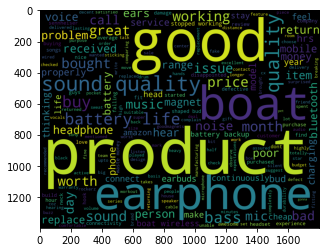

In [57]:
plt.imshow(wordcloud_boat)

In [59]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [60]:
poswords = poswords[36:]

In [61]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [62]:
negwords = negwords[37:]

In [63]:
# negative word cloud
# Choosing the only words which are present in negwords
boat_neg_in_neg = " ".join ([w for w in boat_reviews_words if w in negwords])

In [64]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(boat_neg_in_neg)

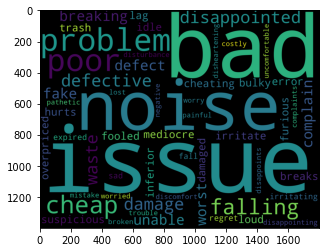

In [65]:
plt.imshow(wordcloud_neg_in_neg)

In [66]:
# Positive word cloud
# Choosing the only words which are present in positive words
boat_pos_in_pos = " ".join ([w for w in boat_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(boat_pos_in_pos)

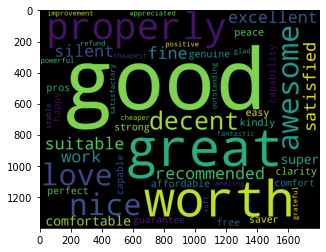

In [67]:
plt.imshow(wordcloud_pos_in_pos)

In [68]:
nltk

<module 'nltk' from 'F:\\Anaconda\\lib\\site-packages\\nltk\\__init__.py'>

In [69]:
# Unique words 
boat_unique_words = list(set(" ".join(boat_reviews).split(" ")))